# Example data analysis notebook

This notebook downloads and analyses some surface air temperature anomaly data from [Berkeley Earth](http://berkeleyearth.org/).

Import the required libraries.

In [1]:
from data_analysis import *

In [2]:
import matplotlib.pyplot as plt

Use the [requests](http://docs.python-requests.org/) library to download the data file for Australia.

Load the data using numpy (skip the header records which are marked with a `%`).

In [3]:
data = fetch_data("australia")

Extract the monthly temperature anomaly and calculate an approximate "decimal year" to use in plotting.

In [4]:
decimal_year = data[:, 0] + 1/12*(data[:, 1] - 1)
temperature_anomaly = data[:, 2]

Plot the data so we can see what it's like.

(1852.5, 2013.6666666666667)

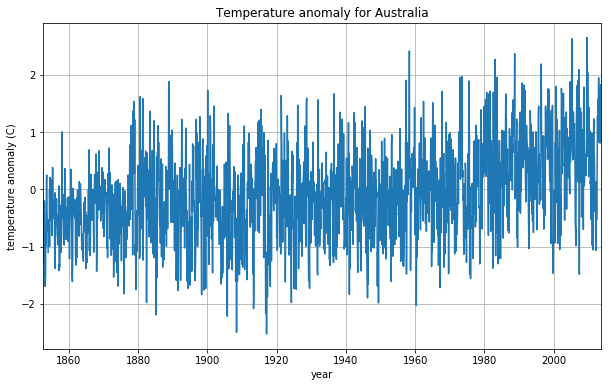

In [5]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())

The data are kind of noisy at this scale so let's calculate a 12-month moving average for a smoother time series.

In [6]:
moving_avg = moving_average(temperature_anomaly, 6)

(1852.5, 2013.6666666666667)

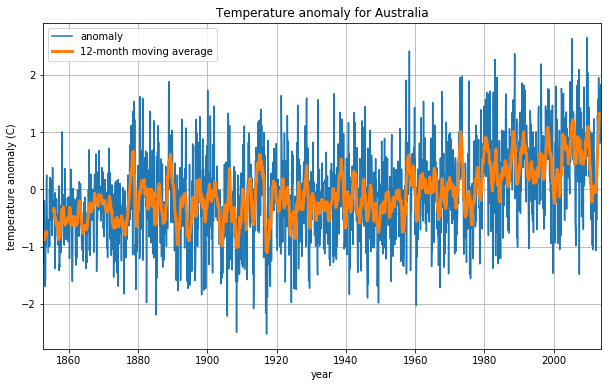

In [7]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly, label="anomaly")
plt.plot(decimal_year, moving_avg, label="12-month moving average", linewidth=3)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.legend()
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())